In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#find neighbors
def Neighbor(L):
    
    L2 = L**2
    neib = np.zeros((L2, 4), dtype=int)
    for i in range(L2):
        neib[i] = np.array([(L*(i//L)+(i%L+1)%L),(L*(i//L)+(i%L-1)%L),(i%L+L*((i//L+1)%L)),(i%L+L*((i//L-1)%L))])

    return neib

In [ ]:

def Ising_2D(T, time, neib, s):
    
    L = len(s)
    
    L2 = L**2
        
    # array that have sum of four neighbors
    q = (np.roll(s,1,axis=0)+np.roll(s,-1,axis=0)+np.roll(s,1,axis=1)+np.roll(s,-1,axis=1))/2
    q = q.flatten().astype(int)
    s = s.flatten() 
    
    prob = np.exp( -np.arange(-8,9,4)/T ) #diff values of probability
    
    rand_choice1 = np.random.randint(0, L2, 2*L2) #choosing a random element
    
    rand_p1 = np.random.random(2*L2)
    
   #wait some monte-carlo step to reach equilibrium
    for i in range(2*L2):
        k = rand_choice1[i]
        if rand_p1[i] < prob[((s[k]*q[k]) + 2)]:
            s[k] = -s[k]
            q[neib[k]] += s[k]

    
    m = np.zeros(time) #magnetization
    
    m[-1] = np.sum(s)/2 #init state of m
    
    e = np.zeros(time) #energy
    
    e[-1] = -np.sum(s*q) #init state of e
    
    rand_choice = np.random.randint(0, L2, time)
    
    rand_p = np.random.random(time)

    for i in range(time):

        k = rand_choice[i]

        if rand_p[i] < prob[((s[k]*q[k]) + 2)]:
            s[k] = -s[k]
            q[neib[k]] += s[k]
            m[i] = m[i-1] + s[k]
            e[i] = -np.sum(s*q)
        else:
            m[i] = m[i-1]
            e[i] = e[i-1]
    m *= 2/L2
    ev_m = abs(np.mean(m))
    var_m = np.var(m)
    var_e = np.var(e)

    return ev_m, var_m, var_e, s.reshape(L,-1)

In [ ]:
#locative correlation length
def corr_len(spin):
    n = len(spin)
    c_s = np.zeros(n)
    mean2 = np.mean(spin) ** 2
    var = np.var(spin)
    if mean2 == 1:
        j = 1
    else:        
        for j in range(n):  
            c_s[j] = (np.mean(spin*(1/2)*(np.roll(spin, j, axis=1)+np.roll(spin, j, axis=0))) - mean2) / var
            if c_s[j] < np.exp(-1):
                break
    return j - 1

In [ ]:
t1 = np.round(np.linspace(1, 4, 31), 2)
t2 = np.round(np.linspace(2, 3, 21), 2)
T = np.unique(np.sort(np.concatenate((t1, t2))))[::-1]
l_s = np.array([30, 45, 60, 75])
ensemble = 200

In [ ]:
mag_s = np.zeros((len(l_s), len(T), ensemble))
heatcap_s = np.zeros((len(l_s), len(T), ensemble))
sus_s = np.zeros((len(l_s), len(T), ensemble))
correlation_s = np.zeros((len(l_s), len(T), ensemble))

In [ ]:
%%time
for i, L in enumerate(l_s):
    time = 400*(L**2)
    neib = Neighbor(L)
    for k in range(ensemble):
        spin = np.random.randint(0,2,(L, L))*2-1
        for j , temp in enumerate(T):
            m, var_m, var_e, spin = Ising_2D(temp, time, neib, spin)
            mag_s[i, j, k] = m
            heatcap_s[i, j, k] = (1/(temp**2))*var_e
            correlation_s[i, j, k] = corr_len(spin)
            sus_s[i, j, k] = (1/(temp))*var_m

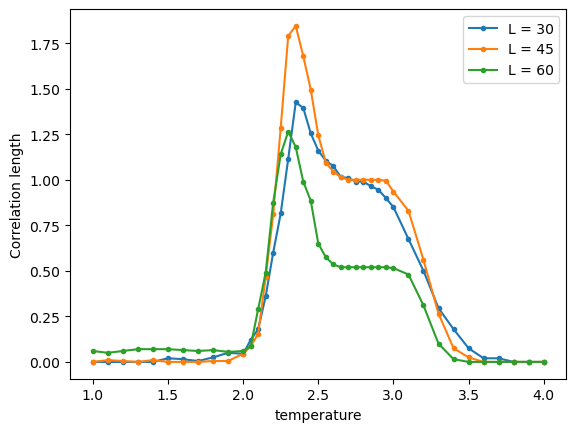

In [69]:
for i in range(3):    
    plt.plot(T, np.mean(correlation_s, axis=2)[i], '.-', label=f"L = {l_s[i]}")
#plt.plot(T, np.mean(correlation_s, axis=1), '.-')
plt.xlabel('temperature')
plt.ylabel('Correlation length')
plt.legend()
plt.show()

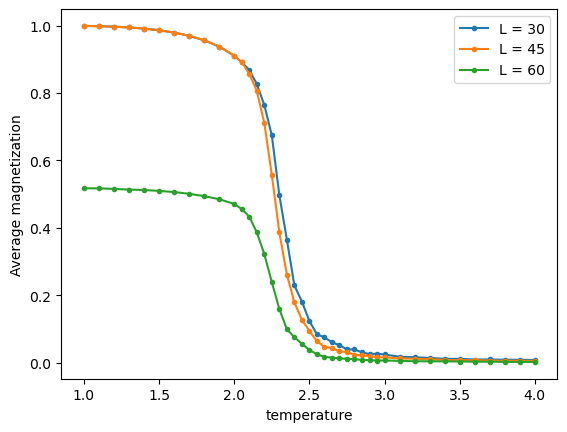

In [71]:
for i in range(3):    
    plt.plot(T, np.mean(mag_s, axis=2)[i], '.-', label=f"L = {l_s[i]}")
#plt.plot(T, np.mean(mag_s, axis=1), '.-')
plt.xlabel('temperature')
plt.ylabel('Average magnetization')
plt.legend()
plt.show()

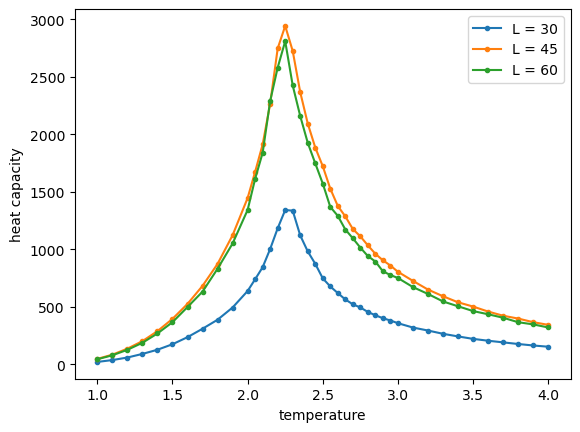

In [72]:
for i in range(3):    
    plt.plot(T, np.mean(heatcap_s, axis=2)[i], '.-', label=f"L = {l_s[i]}")
#plt.plot(T, np.mean(heatcap_s, axis=1)/L**2, '.-')
plt.xlabel('temperature')
plt.ylabel('heat capacity')
plt.legend()
plt.show()

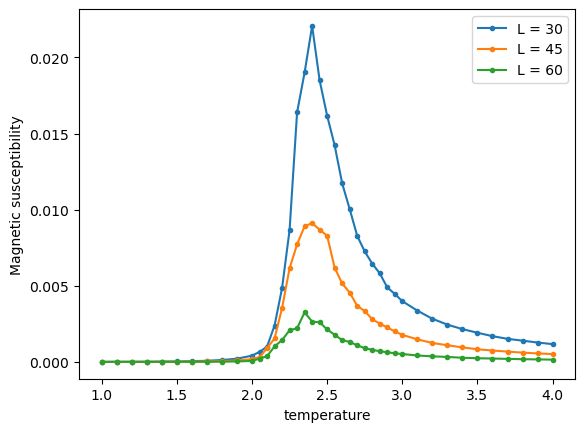

In [73]:
for i in range(3):    
    plt.plot(T, np.mean(sus_s, axis=2)[i], '.-', label=f"L = {l_s[i]}")
#plt.plot(T, np.mean(sus_s, axis=1), '.-')
plt.xlabel('temperature')
plt.ylabel('Magnetic susceptibility')
plt.legend()
plt.show()

In [74]:
max_cap = np.zeros(len(l_s))
T_l_cap = np.zeros(len(l_s))
max_sus = np.zeros(len(l_s))
T_l_sus = np.zeros(len(l_s))
max_corr = np.zeros(len(l_s))
T_l_corr = np.zeros(len(l_s))

In [75]:
for i in range(3):
    max_cap[i] =  np.max(np.mean(heatcap_s, axis=2)[i])
    T_l_cap[i] = T[np.argmax(np.mean(heatcap_s, axis=2)[i])]
    max_sus[i] = np.max(np.mean(sus_s, axis=2)[i])
    T_l_sus[i] = T[np.argmax(np.mean(sus_s, axis=2)[i])]
    max_corr[i] = np.max(np.mean(correlation_s, axis=2)[i])
    T_l_corr[i] = T[np.argmax(np.mean(correlation_s, axis=2)[i])]

In [76]:
print(max_cap)
print(T_l_cap)
print(max_sus)
print(T_l_sus)
print(max_corr)
print(T_l_corr)

[1340.92832379 2941.05020445 2808.18667501    0.        ]
[2.25 2.25 2.25 0.  ]
[0.02207269 0.00911538 0.00326123 0.        ]
[2.4  2.4  2.35 0.  ]
[1.425 1.845 1.265 0.   ]
[2.35 2.35 2.3  0.  ]
